In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data_ox = pd.read_csv("OxCGRT_latest.csv")
data_owid = pd.read_csv("owid-covid-data.csv")

/home/ros1tv/anaconda3/envs/corona_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data_us_p = pd.read_csv("nst-est2019-alldata.csv")

In [4]:
data_us_vacc= pd.read_csv("us_state_vaccinations.csv")

In [35]:
distance_mat = pd.read_csv("distance-matrix.csv")

In [5]:
data_us_vacc.date = pd.to_datetime(data_us_vacc.date, format='%Y-%m-%d')

In [6]:
data_us_vacc = data_us_vacc.rename(columns={'location': 'RegionName'})

In [9]:
data_owid.date = pd.to_datetime(data_owid['date'],format='%Y-%m-%d')

In [10]:
data_ox.Date = pd.to_datetime(data_ox['Date'],format='%Y%m%d')

In [11]:
data_ox = data_ox.rename(columns={'CountryCode': 'iso_code', 
                                  'Date':'date', 
                                  'ConfirmedCases':'total_cases',
                                  'ConfirmedDeaths':'total_deaths'})

In [12]:
us_data_ox = data_ox[data_ox.iso_code == 'USA']
us_data_ox = us_data_ox[us_data_ox['RegionName'].notna()]

In [13]:
data_us_pop = data_us_p.rename(columns = {'NAME':'RegionName', 'POPESTIMATE2019':'population'})[['RegionName','population']]

In [14]:
us_data_ox.shape, data_us_vacc.shape

((22389, 49), (4183, 14))

In [15]:
us_data_state = pd.merge(us_data_ox, data_us_vacc, how='left', on =['RegionName', 'date'])

In [26]:
us_data_state = pd.merge(us_data_state, data_us_pop, how='left', on =['RegionName'])

In [28]:
list(us_data_state.columns)

['CountryName',
 'iso_code',
 'RegionName',
 'RegionCode',
 'Jurisdiction',
 'date',
 'C1_School closing',
 'C1_Flag',
 'C2_Workplace closing',
 'C2_Flag',
 'C3_Cancel public events',
 'C3_Flag',
 'C4_Restrictions on gatherings',
 'C4_Flag',
 'C5_Close public transport',
 'C5_Flag',
 'C6_Stay at home requirements',
 'C6_Flag',
 'C7_Restrictions on internal movement',
 'C7_Flag',
 'C8_International travel controls',
 'E1_Income support',
 'E1_Flag',
 'E2_Debt/contract relief',
 'E3_Fiscal measures',
 'E4_International support',
 'H1_Public information campaigns',
 'H1_Flag',
 'H2_Testing policy',
 'H3_Contact tracing',
 'H4_Emergency investment in healthcare',
 'H5_Investment in vaccines',
 'H6_Facial Coverings',
 'H6_Flag',
 'H7_Vaccination policy',
 'H7_Flag',
 'M1_Wildcard',
 'total_cases',
 'total_deaths',
 'StringencyIndex',
 'StringencyIndexForDisplay',
 'StringencyLegacyIndex',
 'StringencyLegacyIndexForDisplay',
 'GovernmentResponseIndex',
 'GovernmentResponseIndexForDisplay',
 

In [17]:
def state_dict_to_df(state_data, n_rows):
    df = pd.DataFrame(columns=list(state_data.keys()))
    for column, values in state_data.items():
        if isinstance(values, pd.Series):
            df[column] = values.tolist()
        else:
            df[column] = [values] * n_rows
    return df

In [30]:
data_ox['RegionCode'].unique()

array([nan, 'BR_AC', 'BR_AL', 'BR_AM', 'BR_AP', 'BR_BA', 'BR_CE', 'BR_DF',
       'BR_ES', 'BR_GO', 'BR_MA', 'BR_MG', 'BR_MS', 'BR_MT', 'BR_PA',
       'BR_PB', 'BR_PE', 'BR_PI', 'BR_PR', 'BR_RJ', 'BR_RN', 'BR_RO',
       'BR_RR', 'BR_RS', 'BR_SC', 'BR_SE', 'BR_SP', 'BR_TO', 'CAN_AB',
       'CAN_BC', 'CAN_MB', 'CAN_NB', 'CAN_NL', 'CAN_NS', 'CAN_NT',
       'CAN_NU', 'CAN_ON', 'CAN_PE', 'CAN_QC', 'CAN_SK', 'CAN_YT',
       'UK_ENG', 'UK_NIR', 'UK_SCO', 'UK_WAL', 'US_AK', 'US_AL', 'US_AR',
       'US_AZ', 'US_CA', 'US_CO', 'US_CT', 'US_DC', 'US_DE', 'US_FL',
       'US_GA', 'US_HI', 'US_IA', 'US_ID', 'US_IL', 'US_IN', 'US_KS',
       'US_KY', 'US_LA', 'US_MA', 'US_MD', 'US_ME', 'US_MI', 'US_MN',
       'US_MO', 'US_MS', 'US_MT', 'US_NC', 'US_ND', 'US_NE', 'US_NH',
       'US_NJ', 'US_NM', 'US_NV', 'US_NY', 'US_OH', 'US_OK', 'US_OR',
       'US_PA', 'US_RI', 'US_SC', 'US_SD', 'US_TN', 'US_TX', 'US_UT',
       'US_VA', 'US_VT', 'US_WA', 'US_WI', 'US_WV', 'US_WY'], dtype=object)

In [19]:
data_owid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [20]:
data_ox.columns

Index(['CountryName', 'iso_code', 'RegionName', 'RegionCode', 'Jurisdiction',
       'date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing',
       'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'M1_Wildcard', 'total_cases', 'total_deaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'Gove

In [21]:
actions = ['C1_School closing',       
           'C2_Workplace closing',
           'C3_Cancel public events', 
           'C4_Restrictions on gatherings', 
           'C5_Close public transport',
           'C6_Stay at home requirements',
           'C7_Restrictions on internal movement',
           'C8_International travel controls', 
           'E1_Income support', 
           'E2_Debt/contract relief', 
           'E3_Fiscal measures',
           'E4_International support', 
           'H1_Public information campaigns',
           'H2_Testing policy', 
           'H3_Contact tracing',
           'H4_Emergency investment in healthcare', 
           'H5_Investment in vaccines',
           'H6_Facial Coverings', 
           'H7_Vaccination policy', 
           'M1_Wildcard']

In [22]:
data_all = pd.merge(data_owid, data_ox, how='inner', left_on=['iso_code', 'date', 'total_cases', 'total_deaths'], right_on = ['iso_code', 'date', 'total_cases', 'total_deaths'])

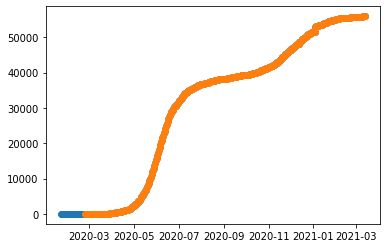

In [23]:
plt.scatter(data_ox[data_ox.iso_code == 'AFG'].date, data_ox[data_ox.iso_code == 'AFG'][['total_cases']])
plt.scatter(data_owid[data_owid.iso_code == 'AFG'].date, data_owid[data_owid.iso_code == 'AFG'][['total_cases']])

In [24]:
data_all = pd.merge(data_ox, data_owid, how='inner', left_on=['iso_code', 'date'], right_on = ['iso_code', 'date'])

In [31]:
data_all.head()

,CountryName,iso_code,RegionName,RegionCode,Jurisdiction,date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-02-24,0.0,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-02-25,0.0,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-02-26,0.0,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-02-27,0.0,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,2020-02-28,0.0,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [34]:
data_all[data_all.iso_code == 'USA']

,CountryName,iso_code,RegionName,RegionCode,Jurisdiction,date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
79374,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-22,0.0,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
79375,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-22,0.0,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
79376,United States,USA,Alabama,US_AL,STATE_TOTAL,2020-01-22,0.0,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
79377,United States,USA,Arkansas,US_AR,STATE_TOTAL,2020-01-22,0.0,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
79378,United States,USA,Arizona,US_AZ,STATE_TOTAL,2020-01-22,0.0,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101053,United States,USA,Vermont,US_VT,STATE_TOTAL,2021-03-13,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
101054,United States,USA,Washington,US_WA,STATE_TOTAL,2021-03-13,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
101055,United States,USA,Wisconsin,US_WI,STATE_TOTAL,2021-03-13,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
101056,United States,USA,West Virginia,US_WV,STATE_TOTAL,2021-03-13,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


In [33]:
list(data_all.columns)

['CountryName',
 'iso_code',
 'RegionName',
 'RegionCode',
 'Jurisdiction',
 'date',
 'C1_School closing',
 'C1_Flag',
 'C2_Workplace closing',
 'C2_Flag',
 'C3_Cancel public events',
 'C3_Flag',
 'C4_Restrictions on gatherings',
 'C4_Flag',
 'C5_Close public transport',
 'C5_Flag',
 'C6_Stay at home requirements',
 'C6_Flag',
 'C7_Restrictions on internal movement',
 'C7_Flag',
 'C8_International travel controls',
 'E1_Income support',
 'E1_Flag',
 'E2_Debt/contract relief',
 'E3_Fiscal measures',
 'E4_International support',
 'H1_Public information campaigns',
 'H1_Flag',
 'H2_Testing policy',
 'H3_Contact tracing',
 'H4_Emergency investment in healthcare',
 'H5_Investment in vaccines',
 'H6_Facial Coverings',
 'H6_Flag',
 'H7_Vaccination policy',
 'H7_Flag',
 'M1_Wildcard',
 'total_cases_x',
 'total_deaths_x',
 'StringencyIndex',
 'StringencyIndexForDisplay',
 'StringencyLegacyIndex',
 'StringencyLegacyIndexForDisplay',
 'GovernmentResponseIndex',
 'GovernmentResponseIndexForDisplay

dictionary for each country with:
1. features (policies + covid data + population etc.)
2. dictionary of country names where each key is the distance to the current country
3. lat, lon of this country

In [36]:
distance_mat

,Unnamed: 0,AD,AE,AF,AG,AI,AL,AM,AN,AO,...,VN,VU,WF,WS,XK,YE,YT,ZA,ZM,ZW
0,AD,0.000000,5219.961593,5705.717586,6569.940072,6591.823599,1542.517822,3598.751350,7512.932869,6202.438018,...,10267.705517,16686.420841,16812.950231,16757.490236,1577.047141,5363.073195,7590.227775,8416.616574,6746.225887,7405.132398
1,AE,5219.961593,0.000000,1784.342012,11703.119049,11751.029583,3694.273216,2026.975685,12650.355877,5489.396437,...,5792.780956,13000.506833,14561.228225,15075.550095,3701.825876,1038.122113,4140.164090,6848.361254,4952.005597,5426.527372
2,AF,5705.717586,1784.342012,0.000000,12222.866445,12218.589517,4214.130992,2118.480131,13143.125978,7271.114520,...,4633.677030,11793.153185,13161.891565,13626.345002,4143.082023,2806.656386,5721.286565,8572.845417,6720.818763,7165.335685
3,AG,6569.940072,11703.119049,12222.866445,0.000000,186.554009,8108.456306,10154.218887,948.251896,9297.904657,...,16387.290125,14819.452243,13106.874542,12574.188271,8146.230029,11558.567395,12198.019301,10476.953749,10395.838596,10713.605515
4,AI,6591.823599,11751.029583,12218.589517,186.554009,0.000000,8133.098552,10164.536689,925.773480,9459.367217,...,16302.567589,14696.116360,12988.051657,12458.493939,8165.751267,11635.829767,12348.484545,10658.556203,10555.281002,10881.309093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,YE,5363.073195,1038.122113,2806.656386,11558.567395,11635.829767,3939.466527,2746.872711,12484.639314,4497.793346,...,6405.259649,13443.259941,15106.975356,15647.007989,3994.097440,0.000000,3177.186989,5812.141655,3916.950365,4389.027999
240,YT,7590.227775,4140.164090,5721.286565,12198.019301,12348.484545,6528.909052,5881.848332,12896.286561,2972.427634,...,7566.526092,12884.946646,14493.457738,14955.201760,6642.123329,3177.186989,0.000000,3015.064297,1876.290063,1843.822329
241,ZA,8416.616574,6848.361254,8572.845417,10476.953749,10658.556203,7979.180578,8177.766549,10883.160678,2214.870996,...,10362.181680,13619.679198,14637.644616,14830.955130,8137.915772,5812.141655,3015.064297,0.000000,2002.114100,1428.078897
242,ZM,6746.225887,4952.005597,6720.818763,10395.838596,10555.281002,6087.938314,6176.809321,11048.191262,1105.240075,...,9357.252193,14512.086912,15948.578082,16303.730403,6238.092484,3916.950365,1876.290063,2002.114100,0.000000,668.692263
